In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Summary Statistics & Missing-Value Report


# Corrected file path and name
file_path = r'C:\Users\KIDIST\Downloads\data\data\togo-dapaong_qc.csv'

# Read the CSV
df = pd.read_csv(file_path)

# Show first 5 rows
# Summary statistics for numeric columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Missing values count and percentage per column
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})

print("\nMissing Values Report:")
print(missing_report)

# Columns with more than 5% missing values
columns_gt_5pct_nulls = missing_report[missing_report['Missing %'] > 5]
print("\nColumns with more than 5% missing values:")
print(columns_gt_5pct_nulls)



Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

In [7]:
import pandas as pd
from scipy.stats import zscore
import os

# 0. Load your original data first (replace with your file path)
df = pd.read_csv(r'C:\Users\KIDIST\Downloads\data\data\togo-dapaong_qc.csv')

# 1. Copy original DataFrame for cleaning
df_clean = df.copy()

# 2. Drop 'Comments' column if exists
if 'Comments' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Comments'])

# 3. Replace negative values in irradiance columns with zero
irradiance_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
for col in irradiance_cols:
    df_clean[col] = df_clean[col].apply(lambda x: 0 if x < 0 else x)

# 4. Calculate Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df_clean[key_cols].apply(zscore)

# 5. Detect outliers
outlier_mask = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outliers detected: {outlier_mask.sum()}")

# 6. Remove outliers
df_clean = df_clean.loc[~outlier_mask].copy()

# 7. Impute missing values in key columns with median
for col in key_cols:
    median_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_value)

# 8. Check remaining missing values
print("Remaining missing values after imputation:")
print(df_clean[key_cols].isna().sum())

# 9. Export cleaned DataFrame to CSV
os.makedirs('data', exist_ok=True)
output_path = r'data/togo_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data exported to {output_path}")


Number of outliers detected: 9257
Remaining missing values after imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned data exported to data/togo_clean.csv


            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00  0.0  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00  0.0  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00  0.0  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00  0.0  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4  


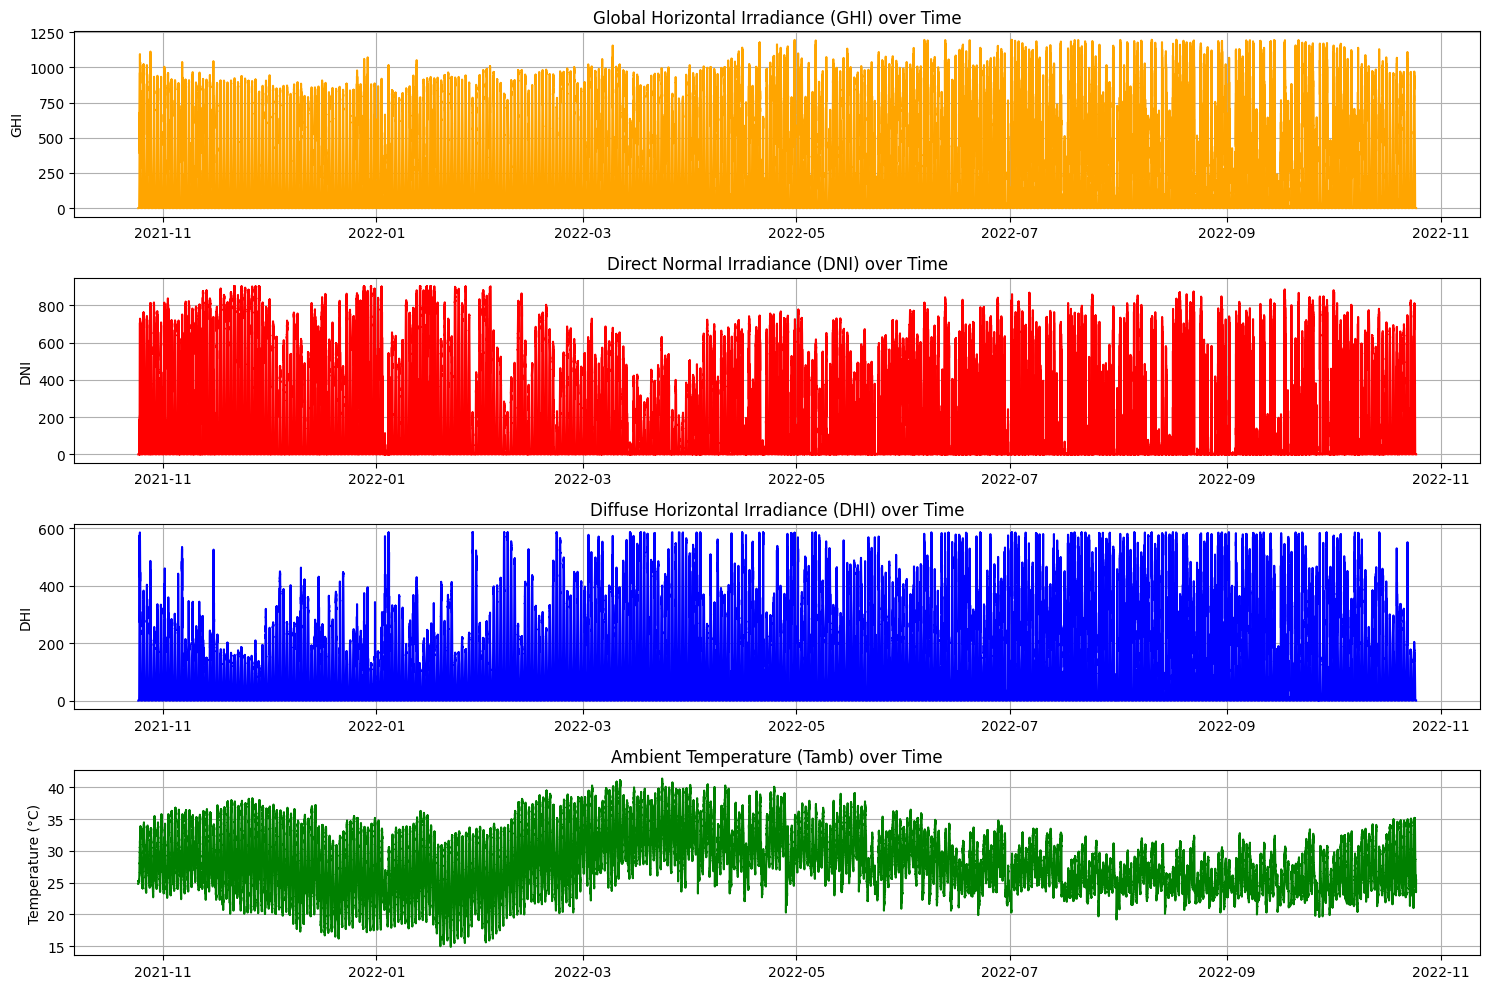

No, 'cleaning_flag' column not found.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#time series analysis
# Load the cleaned data (adjust path if needed)
df_clean = pd.read_csv(r'../notebooks/data/togo_clean.csv', parse_dates=['Timestamp'])

# Verify the data loaded correctly
print(df_clean.head())

# Ensure 'Timestamp' is datetime type
if not pd.api.types.is_datetime64_any_dtype(df_clean['Timestamp']):
    df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set Timestamp as index for easier plotting
df_clean.set_index('Timestamp', inplace=True)

# Plot time series for GHI, DNI, DHI, Tamb
plt.figure(figsize=(15, 10))

plt.subplot(4,1,1)
plt.plot(df_clean.index, df_clean['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.ylabel('GHI')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(df_clean.index, df_clean['DNI'], label='DNI', color='red')
plt.title('Direct Normal Irradiance (DNI) over Time')
plt.ylabel('DNI')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(df_clean.index, df_clean['DHI'], label='DHI', color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) over Time')
plt.ylabel('DHI')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(df_clean.index, df_clean['Tamb'], label='Ambient Temperature (Tamb)', color='green')
plt.title('Ambient Temperature (Tamb) over Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()



if 'cleaning_flag' in df_clean.columns:
    print("Yes, 'cleaning_flag' column exists!")
else:
    print("No, 'cleaning_flag' column not found.")


In [ ]:
# cleaning impact
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import os

# Drop Comments column if exists
if 'Comments' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Comments'])

# Replace negative irradiance values with zero
irradiance_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
for col in irradiance_cols:
    df_clean[col] = df_clean[col].apply(lambda x: 0 if x < 0 else x)

# Calculate z-scores on original data
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df_clean[key_cols].apply(zscore)
outlier_mask = (z_scores.abs() > 3).any(axis=1)

print(f"Number of outliers detected: {outlier_mask.sum()}")

# Create cleaning_flag in original df_clean (1 = clean, 0 = outlier)
df_clean['cleaning_flag'] = (~outlier_mask).astype(int)

# Impute missing values with median after removing outliers for clean data version
df_clean_final = df_clean.loc[df_clean['cleaning_flag'] == 1].copy()
for col in key_cols:
    df_clean_final[col] = df_clean_final[col].fillna(df_clean_final[col].median())

# Export clean data
os.makedirs('data', exist_ok=True)
output_path = 'data/benin_clean.csv'
df_clean_final.to_csv(output_path, index=False)
print(f"Cleaned data exported to {output_path}")

# Group by cleaning_flag (including outliers) and get mean of ModA, ModB
grouped = df_clean.groupby('cleaning_flag')[['ModA', 'ModB']].mean()
print(grouped)

# Plot average ModA & ModB pre/post cleaning
grouped.plot(kind='bar', figsize=(8,6))
plt.title('Average ModA and ModB Pre and Post Cleaning')
plt.xlabel('Cleaning Flag (0=Outlier, 1=Clean)')
plt.ylabel('Average Sensor Reading')
plt.xticks(rotation=0)
plt.show()






Hello  helina Bikes
you are  22 years old
and your current learning status is True
Your favorite language is   python
I am happy to learn with you
hello 20


In [ ]:
# correlation and relationship analysis 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap
# Select columns for correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate correlation matrix
corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Solar and Temperature Variables')
plt.show()


# 2. Scatter plots

# WS, WSgust, WD vs. GHI
scatter_vars = ['WS', 'WSgust', 'WD']
for var in scatter_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_clean, x=var, y='GHI', alpha=0.5)
    plt.title(f'{var} vs. GHI')
    plt.xlabel(var)
    plt.ylabel('GHI')
    plt.show()

# RH vs. Tamb
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='Tamb', y='RH', alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Tamb (Ambient Temperature)')
plt.ylabel('RH (Relative Humidity)')
plt.show()

# RH vs. GHI
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='GHI', y='RH', alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('RH (Relative Humidity)')
plt.show()



In [ ]:
#  wind and distribution analysis
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Make sure your DataFrame is cleaned and named df_clean

# Wind rose plot for WS and WD
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (WS)")
plt.title('Wind Rose Plot (Wind Speed and Direction)')
plt.show()


# Histograms

# Histogram for GHI
plt.figure(figsize=(6,4))
plt.hist(df_clean['GHI'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram for WS (Wind Speed)
plt.figure(figsize=(6,4))
plt.hist(df_clean['WS'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()




In [ ]:
# temperature analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is df_clean and contains 'RH', 'Tamb', 'GHI'

# 1. Correlation between RH, Tamb, and GHI
subset = df_clean[['RH', 'Tamb', 'GHI']].dropna()
corr = subset.corr()
print("Correlation matrix:\n", corr)

# Plot heatmap of these correlations
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: RH, Temperature (Tamb), and GHI")
plt.show()

# 2. Scatter plots with regression lines

# RH vs Temperature
plt.figure(figsize=(6,4))
sns.regplot(x='RH', y='Tamb', data=df_clean, scatter_kws={'alpha':0.4})
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (Tamb)')
plt.show()

# RH vs GHI (Solar Radiation)
plt.figure(figsize=(6,4))
sns.regplot(x='RH', y='GHI', data=df_clean, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relative Humidity vs Solar Radiation (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.show()






In [ ]:
# bubble chart
import matplotlib.pyplot as plt

# Assuming df_clean has 'GHI', 'Tamb', 'RH', and 'BP' columns

# Choose which variable to use for bubble size: 'RH' or 'BP'
size_var = 'RH'  # or 'BP'

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df_clean['GHI'], 
    df_clean['Tamb'], 
    s=df_clean[size_var] * 5,  # scale bubble sizes for better visibility
    alpha=0.5,
    c=df_clean[size_var],  # color bubbles by size variable as well
    cmap='viridis',
    edgecolor='k',
    linewidth=0.5
)

plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.title(f'Bubble Chart: GHI vs Temperature with Bubble Size = {size_var}')

# Add colorbar to show the scale of bubble size variable
cbar = plt.colorbar(scatter)
cbar.set_label(size_var)

plt.show()
